<a href="https://colab.research.google.com/github/syamsulmuariff/scrape_twitter/blob/main/snsscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kita instal dulu snscrape

In [4]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


install juga langdetect

In [5]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 8.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0e60cd14a91ad7a5c400d572b1c26581375af86184a98d81c615f6e4522b1129
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


setelah menginstall kita import library

In [6]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

lalu kita masukkan keyword atau kata kunci yang mau kita cari ditwitter,lalu masukkan start yang isinnya dari tanggal mulai kita mencari kata kunci dan end sampai akhir tanggal pencarian lalu kita masukkan max_num yang artinya maximum banyak jumlah pencarian dan contohnya seperti dibawah ini

In [8]:
keywords=['lesti']
start="2022–09–01"
end ="2022–10–14"
max_num=10
fname='tweet.json' 
languages=['id','en']

setelah mendaptkan kata kunci lalu kita akan melakukan import pandas

In [9]:
import pandas as pd
datatw=[]

lalu kita akan melakukan pencarian ditwitter terkait kata kunci yang kita masukkan dan hasilnya akan ada id,username,tangga tweet,content,tweet url dari pengguna di twitter

In [10]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{'id': 1581109651311329280, 'username': 'CuitanIni', 'date': datetime.datetime(2022, 10, 15, 2, 28, 11, tzinfo=datetime.timezone.utc), 'text': 'Yuk siapa lagi yang mau cairin sisa saldo pelatihan. Sayang banget kan kalo dianggurin. Mending dicairin. Boleh kontak kita yaa\n#lesti #billar #leslar #KDRT #Innalillahi  #prayforbogor https://t.co/jJxo8ZUIry', 'url': 'https://twitter.com/CuitanIni/status/1581109651311329280'}
{"id": 1581109651311329280, "username": "CuitanIni", "date": "2022-10-15 02:28:11+00:00", "text": "Yuk siapa lagi yang mau cairin sisa saldo pelatihan. Sayang banget kan kalo dianggurin. Mending dicairin. Boleh kontak kita yaa\n#lesti #billar #leslar #KDRT #Innalillahi  #prayforbogor https://t.co/jJxo8ZUIry", "url": "https://twitter.com/CuitanIni/status/1581109651311329280"}
{'id': 1581109641261756417, 'username': '0xbluessyi', 'date': datetime.datetime(2022, 10, 15, 2, 28, 8, tzinfo=datetime.timezone.utc), 'text': 'Demi apapun gue GAK heran perihal LESTI KARENA di dunia

kita install sastrawi terlebih dahulu

In [11]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.7 MB/s 


lalu kita import library yaitu import re,string,stemmerfactory,proses ini untuk menghilangkan kata berimbuan menjadi kata dasar

In [12]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

lalu kita tampilkan dokumen dengan documnet_clean

In [13]:
documents_clean

['yuk siapa yang mau cairin sisa saldo latih sayang banget kan kalo dianggurin mending dicairin kontak yaa lesti billar leslar kdrt innalillahi prayforbogor https t co jjxozuiry',
 'apa gue gak heran perihal lesti di dunia nyata persis kek temen gue lakiknya udh mah tukang selingkuh mabok kdrt temen gue udah nanya syarat cerai udah apdet story mau cerai eh lakiknya minta maaf luluh ih najesss',
 'cryptokingever monchairy hlohwin luvtowins ckconquerors congrats moga nular ak hoki',
 'nenek marah marah soal lesti hshs',
 'bener sih yg gue tanya orang keluarga keliling lesti apa gak yg ngebimbing https t co izscqrgz',
 'eros mungkin lesti kita bin sekarang sedang usaha putus hubung laku mungkin blm hasil mnurut buah studi inggris bukti butuh kali coba orang korban kdrt dia hasil lepas laku',
 'udah capek aku liat berita lesti kiri kanan depan belakang ngomongin leslar mulu serah lu les terserahh ngulang jadi nya cuma bilang kan',
 'ashayzr jangan isi lesti w lg fakum dulu',
 'convomfs men

lalu kita akan mengimport tfidfvectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


setelah mendapatkan data dari kata kunci tadi lalu akan dibuat diagram seperti dibawah ini yang menampilkan kata yang terbaik dari 20 besar

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

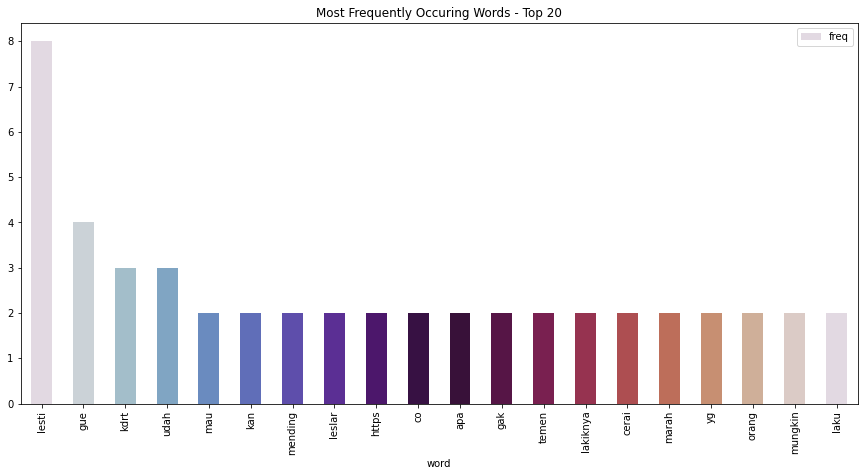

In [31]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

setelah mendapatkan kata lalu kita akan melakukkan clustering pada kata tersebut

In [32]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

setelah itu kita akan melihat hasil clustering dibawah ini dengan kata kunci yang kita cari diatas tadi

In [33]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 lesti
 yg
 https
 co
 mending
 marah
 kan
 leslar
 hshs
 jjxozuiry
Cluster 1:
 gue
 udah
 cerai
 lakiknya
 temen
 di
 mabok
 mah
 maaf
 dunia
Cluster 2:
 hasil
 laku
 mungkin
 eros
 sedang
 putus
 coba
 orang
 dia
 mnurut




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


setelah melakukan cluster kita bisa juga melakukan prediction kata tersebut masuk ke cluster berapa seperti contoh dibawah ini

In [34]:
print("Prediction")
Y = cv.transform(["lesti marah"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["cerai"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


lalu kita buat diagram/dendogram nya seperti ini 

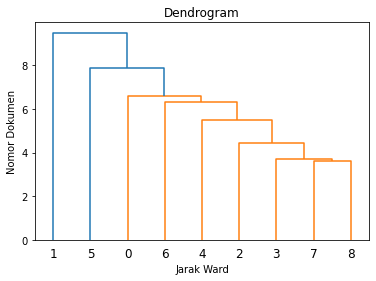

In [35]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

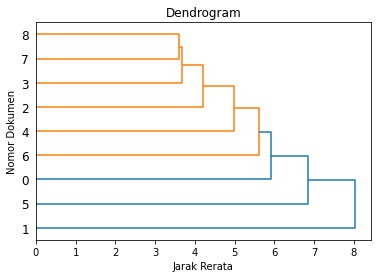

In [36]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[3 4 0 0 5 2 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


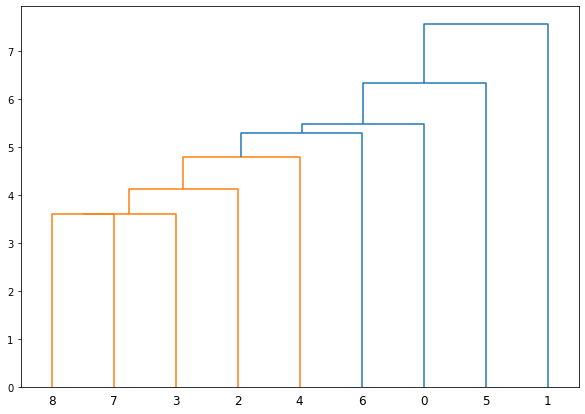

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, 9)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


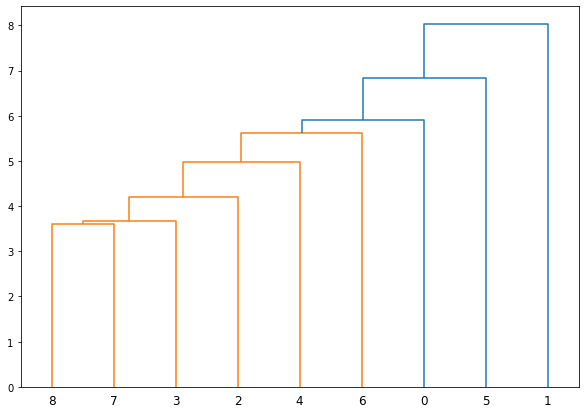

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, 9)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721